<center><h1 style="color:#000080; font-size:50px">SMS Classifier</h1></center>

<p><b>Import necessary libraries</p>

In [1]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

<p><b>Import Data</p>

In [2]:
data = pd.read_csv("spam.csv", encoding="ISO-8859-1")
data.head(11)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


<p><b>Data Preprocessing And Data Cleaning</p>

In [3]:
columns_to_remove = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4']
data.drop(columns=columns_to_remove, inplace=True)
data.head(11)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [4]:
data['v1'] = data['v1'].apply(lambda x: x.lower() if isinstance(x, str) else x)
data['v1'] = data['v1'].str.replace('[^\w\s]', '')

In [5]:
data['v2'] = data['v2'].apply(lambda x: x.lower() if isinstance(x, str) else x)
data['v2'] = data['v2'].str.replace('[^\w\s]', '')

In [6]:
tfidf_vectorizer_v2 = TfidfVectorizer(stop_words='english')
X_v2 = tfidf_vectorizer_v2.fit_transform(data['v2'])
y_v1 = data['v1']  # Assuming 'v1' is the target column

<p><b>Split the Dataset into Training and Testing Sets</p>

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_v2, y_v1, test_size=0.2, random_state=42)

<p><b>Model Implementation</p>

In [8]:
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

MultinomialNB()

In [9]:
y_pred = classifier.predict(X_test)

In [10]:
print("Classification Report:")
print(classification_report(y_test, y_pred, zero_division=1))

Classification Report:
              precision    recall  f1-score   support

         ham       0.96      1.00      0.98       965
        spam       1.00      0.77      0.87       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.93      1115
weighted avg       0.97      0.97      0.97      1115



In [11]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.968609865470852


In [12]:
train_sizes, train_scores, test_scores = learning_curve(
    classifier, X_v2, y_v1, cv=5, scoring='accuracy', train_sizes=[0.1, 0.3, 0.5, 0.7, 0.9, 1.0]
)

In [13]:
train_mean = train_scores.mean(axis=1)
train_std = train_scores.std(axis=1)
test_mean = test_scores.mean(axis=1)
test_std = test_scores.std(axis=1)

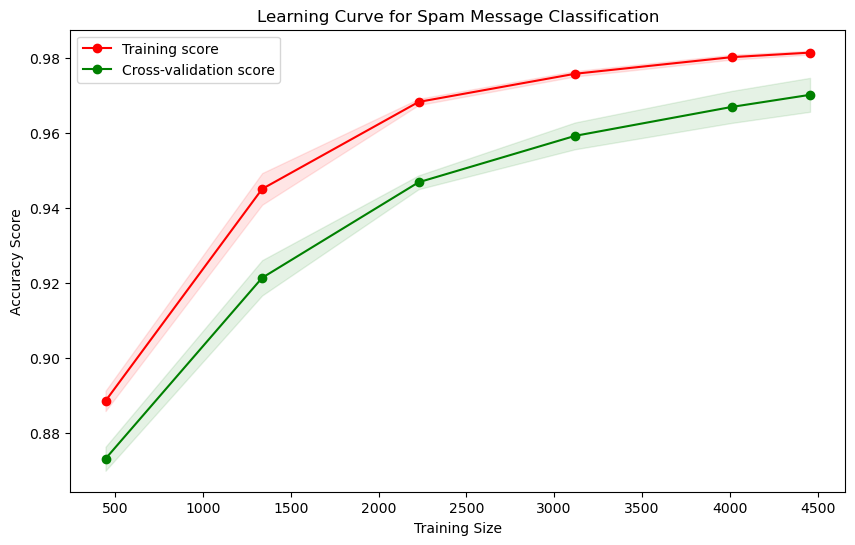

In [14]:
plt.figure(figsize=(10, 6))
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_mean, 'o-', color="g", label="Cross-validation score")
plt.xlabel("Training Size")
plt.ylabel("Accuracy Score")
plt.title("Learning Curve for Spam Message Classification")
plt.legend(loc="best")
plt.show()